In [11]:
import time
import numpy as np
import albumentations as A
import cv2
import torch as T
import torchvision as tv
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from matplotlib import pyplot as plt
from PIL import Image
import os


In [12]:
def get_albumentations_transforms():
    return A.Compose([
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=45, p=0.5),
    ])

# bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids'])

In [15]:
class CustomDataset(Dataset):
    def __init__(self, image_folder, label_folder, transform=None):
        self.image_folder = image_folder
        self.label_folder = label_folder
        self.image_names = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
        self.transform = transform

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_name = self.image_names[idx]
        img_path = os.path.join(self.image_folder, img_name)
        label_path = os.path.join(self.label_folder, img_name.replace('.jpg', '.txt'))

        image = np.array(Image.open(img_path).convert("RGB"))

        with open(label_path, 'r') as file:
            label = file.read().strip()

        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        
        image = T.from_numpy(image.transpose((2, 0, 1))).float() / 255.0
        return image, label

# Usage
image_folder = "C:/Users/yhd06/OneDrive/Desktop/iwaz/pothole_data/pothole_dataset/images"
label_folder = "C:/Users/yhd06/OneDrive/Desktop/iwaz/pothole_data/pothole_dataset/labels"
albumentations_transform = get_albumentations_transforms()
dataset = CustomDataset(image_folder, label_folder, transform=albumentations_transform)


In [16]:
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=0)

# Iterate through the DataLoader
for i, (images, labels) in enumerate(dataloader):
    print(images.shape, labels)
    if i == 1:  # Just to check the first batch
        break


torch.Size([4, 3, 1080, 1920]) ('0 0.4302109375 0.47179166666666666 0.09825520833333339 0.04502777777777777', '0 0.28241666666666665 0.4059027777777778 0.05456249999999999 0.02397222222222221', '0 0.4624036458333334 0.6462592592592593 0.08574479166666667 0.052333333333333315', '0 0.4563723958333333 0.502273148148148 0.075453125 0.03626851851851848')
torch.Size([4, 3, 1080, 1920]) ('0 0.39961979166666667 0.2219814814814815 0.04619791666666669 0.02288888888888889', '0 0.29122135416666667 0.4133472222222222 0.055026041666666685 0.02617592592592596', '0 0.0988671875 0.5092546296296296 0.05621354166666666 0.04845370370370364', '0 0.7958958333333332 0.6924722222222223 0.08804166666666677 0.07857407407407398')


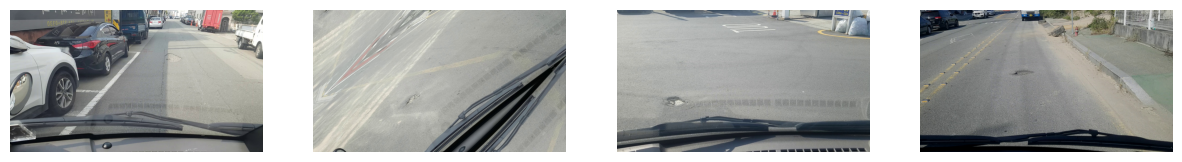

In [17]:
def show_images(images, nmax=4):
    fig, axs = plt.subplots(1, nmax, figsize=(15, 15))
    for i in range(nmax):
        img = images[i].numpy().transpose((1, 2, 0))
        axs[i].imshow(img)
        axs[i].axis('off')
    plt.show()

# Get a batch of images
images, _ = next(iter(dataloader))
show_images(images, nmax=4)
